In [1]:
!pip install -Uqq fastbook
!pip install -Uqq ddgs
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.2 MB/s eta 0:00:00


In [2]:
import fastbook
#fastbook.setup_book()
from ddgs import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *


In [3]:
def search_images(keywords, max_images=200):
  urls = L(DDGS().images(keywords,
                         max_results=max_images,
                         region="us-en",
                         timelimit="y",
                         safeseach="off")).itemgot("image")
  return urls

In [4]:
ims = search_images('grizzly bear')
len(ims)

98

In [5]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

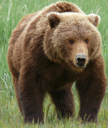

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')


In [8]:
download_images?

In [9]:
if not path.exists():
    path.mkdir()
for o in bear_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  results = search_images(f'{o} bear')
  download_images(dest, urls=results)

In [10]:
fns = get_image_files(path)
fns

(#249) [Path('bears/black/0a6bc17b-8217-49f7-89df-22a44bbff2db.jpeg'),Path('bears/black/1c373a44-3609-4d37-8935-5d260176f510.jpg'),Path('bears/black/e443c0b2-39a2-4181-a909-3b7cbc7aec71.jpeg'),Path('bears/black/9ca07385-b189-4967-a0c8-434b11aacfd3.jpeg'),Path('bears/black/6a323375-6e4c-4681-8e4c-51e7338d65cd.png'),Path('bears/black/6edf485b-740a-4d42-98c3-9d0c5c2677a1.jpg'),Path('bears/black/33b5ea68-0dde-4c1c-9c04-bd722aac636e.jpg'),Path('bears/black/e259858e-974e-4a20-8a46-02ad1372b915.jpg'),Path('bears/black/d14519ff-b229-4f8d-aa32-2535331acb6f.jpg'),Path('bears/black/4d845162-4ea6-4c00-8c3b-1abd4efd4704.png'),Path('bears/black/3ef6f58c-a7d2-4c56-bac5-ddcc50161912.jpg'),Path('bears/black/b9dd57d0-2250-49ac-9c27-74a66a8bb34a.jpeg'),Path('bears/black/4727fcba-c725-48d9-965e-02b0c9997797.jpg'),Path('bears/black/22901772-dab5-45c4-965c-8c8a91a6dd59.png'),Path('bears/black/f4f6ca83-500e-470d-a509-949e9a4da340.jpeg'),Path('bears/black/b681fcd2-de6b-4ec4-bdff-d02b988369de.jpg'),Path('bears

In [11]:
failed = verify_images(fns)
failed

(#3) [Path('bears/black/e2cfef68-618f-484c-98b5-3eb21136e1bc.png'),Path('bears/black/22d85271-aee6-4005-b702-01a213cb1d45.jpg'),Path('bears/grizzly/17e6297d-9f0e-4b13-9ca9-160c66149718.png')]

In [12]:
failed.map(Path.unlink)

(#3) [None,None,None]

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(valid_pct=0.2, seed=42),
            get_y=parent_label,
            item_tfms=Resize(128)
)

In [14]:
dls = bears.dataloaders(path)

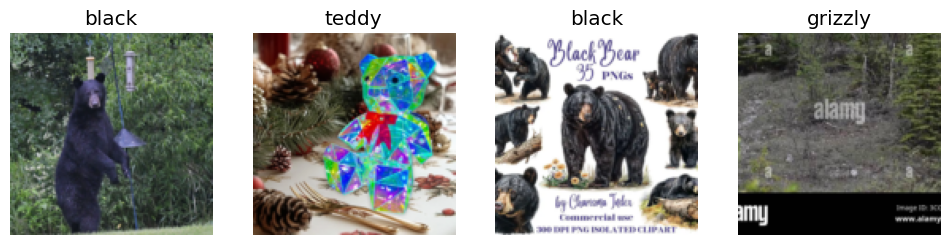

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

In [16]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 190MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.124132,1.139268,0.428571,00:08


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.859603,0.581054,0.285714,00:07
1,0.672033,0.410427,0.163265,00:08
2,0.534869,0.396291,0.122449,00:09
3,0.423383,0.382356,0.102041,00:07


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in by

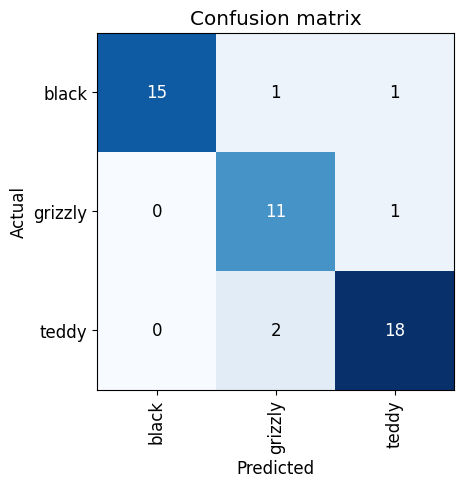

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

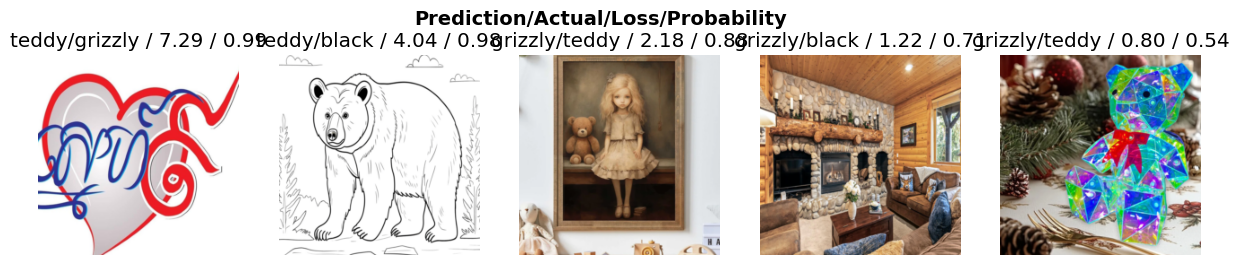

In [19]:
interp.plot_top_losses(5, nrows=1)


In [21]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [29]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink(missing_ok = True)
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)


In [30]:
learn.export()

In [32]:
learn_inf = load_learner(Path('export.pkl'))

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [33]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([5.8011e-04, 9.9942e-01, 2.0211e-06]))

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [36]:
img = PILImage.create(btn_upload.data[-1])

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [38]:
pred,pred_idx,probs = learn_inf.predict(img)

In [39]:

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9994')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
btn_upload = widgets.FileUpload()

In [43]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

IndexError: list index out of range

In [44]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi